In [1]:
import pandas as pd
dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.06.08_RedesNeurais/Admission_Predict.csv')

In [2]:
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
#dadosx=dados.drop('ChanceOfAdmit ', axis=1)
dadosx=dados.drop(['ChanceOfAdmit ','Serial No.'], axis=1)

In [4]:
dadosx

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [5]:
dadosy=dados['ChanceOfAdmit ']

In [6]:
dadosy

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: ChanceOfAdmit , Length: 400, dtype: float64

In [7]:
dadosx.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [8]:
dadosx.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
dtype: object

In [9]:
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste=train_test_split(dadosx, dadosy, test_size=0.3, shuffle=True)

In [10]:
xtreino

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
146,315,105,3,2.0,2.5,8.48,0
111,321,109,4,4.0,4.0,8.68,1
76,327,112,3,3.0,3.0,8.72,1
344,295,96,2,1.5,2.0,7.34,0
134,333,113,5,4.0,4.0,9.28,1
...,...,...,...,...,...,...,...
85,319,103,4,4.5,3.5,8.66,0
328,324,112,4,4.0,3.5,8.77,1
75,329,114,2,2.0,4.0,8.56,1
240,296,101,1,2.5,3.0,7.68,0


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
modelo=Sequential()
modelo.add(Dense(4, input_dim=7, kernel_initializer='normal', activation='relu'))
#modelo.add(Dense(4, kernel_initializer='normal', activation='relu'))
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))
otimizador=Adam()

In [12]:
modelo.compile(loss='mean_squared_error', optimizer=otimizador, metrics=['mean_squared_error'] )

In [13]:
historico=modelo.fit(xtreino,ytreino,epochs=1000,batch_size=280,validation_data=(xteste,yteste),verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 397ms/step - loss: 0.8171 - mean_squared_error: 0.8171 - val_loss: 0.7247 - val_mean_squared_error: 0.7247
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7493 - mean_squared_error: 0.7493 - val_loss: 0.6628 - val_mean_squared_error: 0.6628
Epoch 3/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6862 - mean_squared_error: 0.6862 - val_loss: 0.6053 - val_mean_squared_error: 0.6053
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6275 - mean_squared_error: 0.6275 - val_loss: 0.5518 - val_mean_squared_error: 0.5518
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5728 - mean_squared_error: 0.5728 - val_loss: 0.5018 - val_mean_squared_error: 0.5018
Epoch 6/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5216 - mean_squared_error: 0.5216 - val_loss: 0.4545 - val_mean_squared_error: 0.4545
Epoch 7/1000
1/1 [===============

1/1 [==============================] - 0s 25ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 52/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 53/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 54/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 55/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 56/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 57/1000
1/1 [=======================

Epoch 102/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 103/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 104/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 105/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 106/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 107/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 108/1000
1/1 [==

1/1 [==============================] - 0s 22ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 153/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 154/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 155/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 156/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 157/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 158/1000
1/1 [=================

1/1 [==============================] - 0s 22ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 203/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 204/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 205/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 206/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 207/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 208/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 253/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 254/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 255/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 256/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 257/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 258/1000
1/1 [=================

1/1 [==============================] - 0s 22ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 303/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 304/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 305/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 306/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 307/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 308/1000
1/1 [=================

1/1 [==============================] - 0s 24ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 353/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 354/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 355/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 356/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 357/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 358/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 403/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 404/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 405/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 406/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 407/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 408/1000
1/1 [=================

1/1 [==============================] - 0s 22ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 453/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 454/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 455/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 456/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 457/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 458/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 503/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 504/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 505/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 506/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 507/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 508/1000
1/1 [=================

1/1 [==============================] - 0s 22ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 553/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 554/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 555/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 556/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 557/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 558/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 603/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 604/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 605/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 606/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 607/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 608/1000
1/1 [=================

1/1 [==============================] - 0s 24ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 653/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 654/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 655/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 656/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 657/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 658/1000
1/1 [=================

1/1 [==============================] - 0s 22ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 703/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 704/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 705/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 706/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 707/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 708/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 753/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 754/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 755/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 756/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 757/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 758/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 803/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 804/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 805/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 806/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 807/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 808/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 853/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 854/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 855/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 856/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 857/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 858/1000
1/1 [=================

1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 903/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 904/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 905/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 906/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 907/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 908/1000
1/1 [=================

1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 953/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 954/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 955/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 956/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 957/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 958/1000
1/1 [=================

Text(0, 0.5, 'MAE')

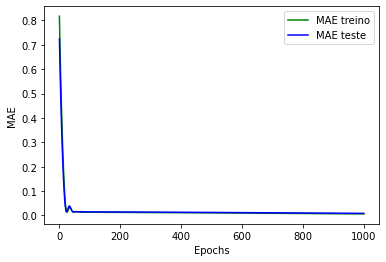

In [15]:
import matplotlib.pyplot as plt
treino=historico.history['mean_squared_error']
teste=historico.history['val_mean_squared_error']
epocas=range(1,len(treino)+1)
plt.plot(epocas,treino,'-g',label='MAE treino')
plt.plot(epocas,teste,'-b',label='MAE teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')